In [840]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [841]:
#load the dataset
df=pd.read_csv('car_price.csv')

In [842]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [844]:
#removing missing values
df.dropna(inplace=True)

In [845]:
df.shape

(837, 6)

In [846]:
#handling price section
df=df[df['Price']!="Ask For Price"]

In [847]:
df.shape

(816, 6)

In [848]:
#name
df['name']=df['name'].str.split().str[:3].str.join(' ')

In [849]:
#year
df['year']=df['year'].astype(int)

In [850]:
#price
df['Price']=df['Price'].str.replace(',','').astype(int)

In [851]:
#kms_driven
df['kms_driven']=df['kms_driven'].str.replace('kms','').str.replace(',','').astype(int)

In [852]:
#add car age
from datetime import datetime

curr_year=datetime.now().year
df['car_age']= curr_year-df['year']

In [853]:
df.head()

,name,company,year,Price,kms_driven,fuel_type,car_age
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,19
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,20
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,12
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,12
6,Ford Figo,Ford,2012,175000,41000,Diesel,14


In [854]:
#handling outlier
df=df[df['Price']<1000000] 

In [855]:
df['Price'].describe()

count       765.000000
mean     324768.214379
std      205313.158326
min       30000.000000
25%      165000.000000
50%      280000.000000
75%      448000.000000
max      984999.000000
Name: Price, dtype: float64

In [856]:
df.shape

(765, 7)

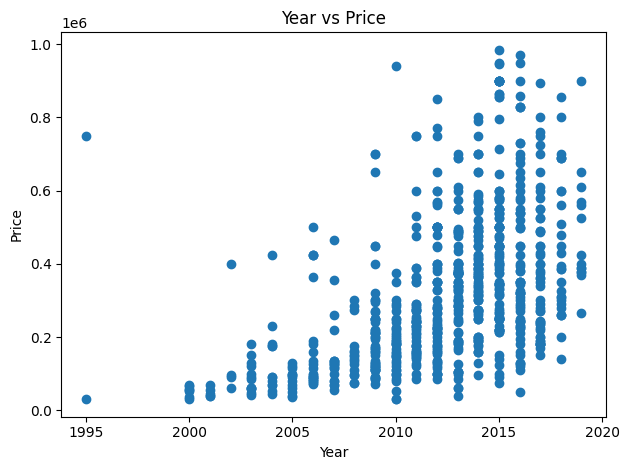

In [857]:
#price vs year
plt.scatter(df['year'],df['Price'])
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()

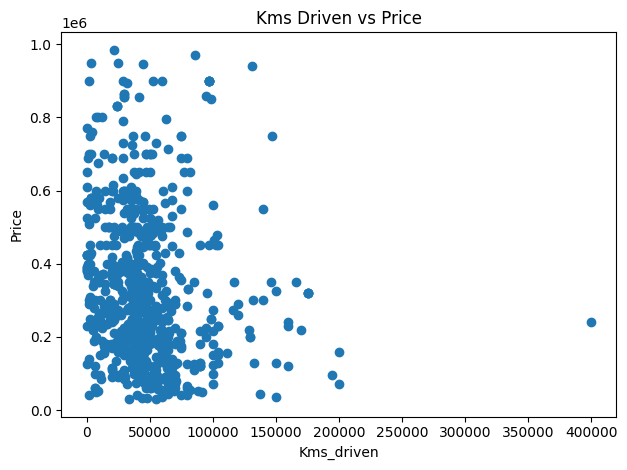

In [858]:
#kms_driven vs price
plt.scatter(df['kms_driven'],df['Price'])
plt.title('Kms Driven vs Price')
plt.xlabel('Kms_driven')
plt.ylabel('Price')
plt.tight_layout()

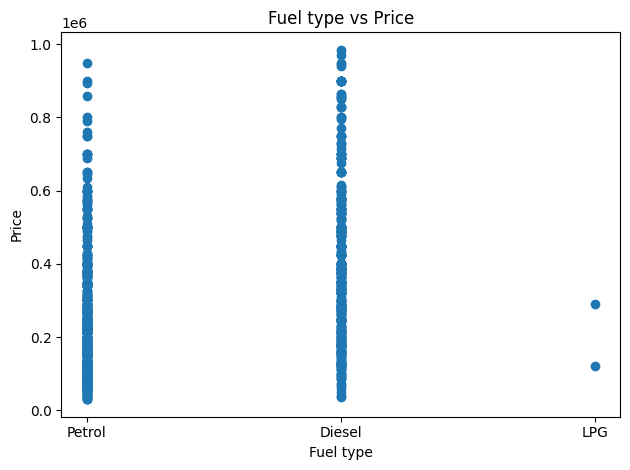

In [859]:
#fuel type vs price
plt.scatter(df['fuel_type'], df['Price'])
plt.title('Fuel type vs Price')
plt.xlabel('Fuel type')
plt.ylabel('Price')
plt.tight_layout()

In [860]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [861]:
X= df.drop(columns=['Price','year'])
y= df['Price']

In [862]:
#data distribution
X_train, X_test, y_train,y_test= train_test_split(X,y, random_state= 90, shuffle=True, test_size=0.30)

In [863]:
preprocessor= ColumnTransformer(
    transformers=[
        ('bat',OneHotEncoder(handle_unknown='ignore'),
         ['name','company','fuel_type'])
    ],
    remainder='passthrough'
)

In [864]:
pipe= Pipeline([
    ('preprocessing',preprocessor),
    ('model',LinearRegression())
])

In [865]:
#model train 
pipe.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('bat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains

In [866]:
y_pred=pipe.predict(X_test)

In [867]:
r2_score(y_test, y_pred)

0.6178966784509695

In [868]:
import pickle 
pickle.dump(pipe, open('car_price_model.pkl','wb'))